In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as mat
import seaborn as s

In [3]:
my_data=pd.read_csv("drug200.csv")
my_data.dtypes
a=my_data['Sex']
my_data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

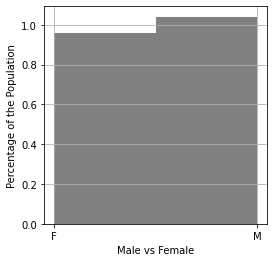

In [11]:
x=my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
a=my_data['Sex'].dropna().tolist()
mat.figure(figsize=(4,4))

mat.hist(a,histtype='barstacked',color='grey',bins=2,density=True)
mat.xlabel('Male vs Female')
mat.ylabel('Percentage of the Population')
mat.grid(True)
mat.show()




Text(0.5, 1.0, 'male and female')

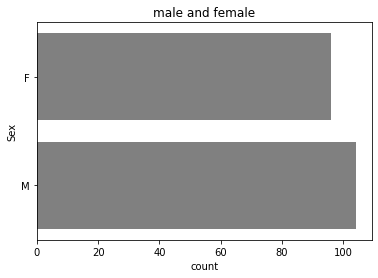

In [5]:
s.countplot(y='Sex',data=my_data,color='grey').set_title('male and female')

In [12]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])

x[:,1]=le_sex.transform(x[:,1])

le_bp=preprocessing.LabelEncoder()
le_bp.fit(['LOW','NORMAL','HIGH'])
x[:,2]=le_bp.transform(x[:,2])
x

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.114],
       [28, 0, 2, 'HIGH', 7.798],
       [61, 0, 1, 'HIGH', 18.043],
       [22, 0, 2, 'HIGH', 8.607],
       [49, 0, 2, 'HIGH', 16.275],
       [41, 1, 1, 'HIGH', 11.037],
       [60, 1, 2, 'HIGH', 15.171],
       [43, 1, 1, 'NORMAL', 19.368],
       [47, 0, 1, 'HIGH', 11.767],
       [34, 0, 0, 'NORMAL', 19.199],
       [43, 1, 1, 'HIGH', 15.376],
       [74, 0, 1, 'HIGH', 20.942],
       [50, 0, 2, 'HIGH', 12.703],
       [16, 0, 0, 'NORMAL', 15.516],
       [69, 1, 1, 'NORMAL', 11.455],
       [43, 1, 0, 'HIGH', 13.972],
       [23, 1, 1, 'HIGH', 7.298],
       [32, 0, 0, 'NORMAL', 25.974],
       [57, 1, 1, 'NORMAL', 19.128],
       [63, 1, 2, 'HIGH', 25.917],
       [47, 1, 1, 'NORMAL', 30.568],
       [48, 0, 1, 'HIGH', 15.036],
       [33, 0, 1, 'HIGH', 33.486],
       [28, 0, 0, 'NORMAL', 18.809],
       [31, 1, 0, 'HIGH', 30.366],
       [49, 0, 2, 'NORMAL', 9.381],
      

In [8]:
le_chol=preprocessing.LabelEncoder()
le_chol.fit(['NORMAL','HIGH'])

x[:,3]=le_chol.transform(x[:,3])
x

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

In [13]:
y=my_data['Drug']
my_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [14]:
from sklearn.model_selection import train_test_split
x_trainset,x_testset,y_trainset,y_testset=train_test_split(x,y,test_size=0.4,random_state=1)

In [57]:
x_testset.shape

(80, 5)

In [58]:
tree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
tree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
predtree=tree.predict(x_testset)
predtree

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugX', 'drugB', 'drugY', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY',
       'drugC', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugX', 'drugB', 'drugY', 'drugX', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'drugX', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugC', 'drugY', 'drugC', 'drugY', 'drugX', 'drugY',
       'drugX', 'drugY', 'drugY'], dtype=object)

In [61]:
print (y_testset [0:5])

58     drugX
40     drugY
34     drugX
102    drugC
184    drugY
Name: Drug, dtype: object


In [73]:
from sklearn import metrics
print("accuracy is",metrics.accuracy_score(y_testset,tree.predict(x_testset)))

accuracy is 0.975


array([[60, 1, 2, 1, 10.091],
       [73, 0, 2, 0, 19.221],
       [53, 1, 2, 0, 14.133],
       [28, 0, 1, 0, 13.127],
       [18, 0, 0, 0, 37.188],
       [23, 1, 2, 1, 14.02],
       [36, 1, 1, 1, 11.424],
       [61, 0, 1, 0, 18.043],
       [45, 1, 1, 0, 17.951],
       [51, 0, 1, 1, 23.003],
       [45, 1, 1, 1, 10.017],
       [23, 1, 1, 0, 7.298],
       [34, 0, 0, 1, 19.199],
       [50, 0, 2, 1, 17.211],
       [50, 1, 0, 0, 7.49],
       [32, 0, 0, 1, 10.292],
       [34, 0, 1, 1, 12.923],
       [46, 1, 2, 1, 7.285],
       [55, 0, 0, 0, 10.977],
       [34, 1, 0, 0, 18.703],
       [67, 1, 2, 1, 10.898],
       [69, 1, 1, 1, 11.455],
       [50, 0, 2, 1, 12.295],
       [56, 1, 1, 0, 15.015],
       [74, 1, 0, 0, 9.567],
       [43, 1, 2, 1, 12.859],
       [39, 0, 2, 1, 9.709],
       [39, 0, 1, 1, 22.697],
       [72, 1, 1, 0, 6.769],
       [49, 0, 2, 1, 9.381],
       [68, 1, 1, 0, 10.291],
       [38, 1, 1, 0, 18.295],
       [46, 0, 0, 0, 34.686],
       [25, 1, 2, 0